In [1]:
from geometry_tools import hyperbolic, utils, drawtools
import pdb
import numpy as np

In [2]:
octagon = hyperbolic.Polygon.regular_surface_polygon(2, base_ring=SR)
octagon.change_base_ring(QQbar, inplace=True)

rot = hyperbolic.Isometry.standard_rotation(2 * pi / 8).change_base_ring(QQbar)
octagon2 = rot.apply(octagon)

In [3]:
#find the unit tangent vectors
forward_tv = octagon.unit_tangent_towards(octagon2)
backward_tv = rot.inv().apply(octagon2.unit_tangent_towards(octagon))

In [4]:
surface_gp_rep = hyperbolic.HyperbolicRepresentation()

surface_gp_rep["a"] = forward_tv[0].isometry_to(backward_tv[3])
surface_gp_rep["b"] = forward_tv[1].isometry_to(backward_tv[4])
surface_gp_rep["c"] = forward_tv[4].isometry_to(backward_tv[7])
surface_gp_rep["d"] = forward_tv[5].isometry_to(backward_tv[0])

In [5]:
relation = "bABadCDc"

surface_gp_rep[relation].proj_data == utils.identity(3, base_ring=QQbar)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [6]:
elts = surface_gp_rep.freely_reduced_elements(2)
octagons = elts @ octagon

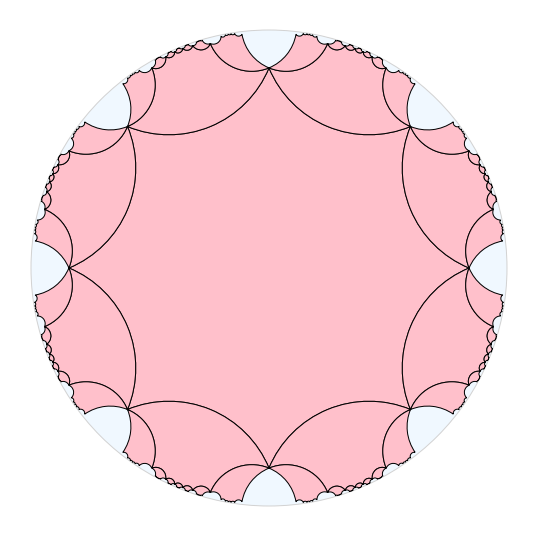

In [7]:
fig = drawtools.HyperbolicDrawing()
fig.draw_plane()

fig.draw_polygon(octagons, facecolor="pink")